In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("High_Value_Dataset__July_2024.csv")
data.head()

,SID Number,TDCJ Number,Name,Current Facility,Gender,Race,Age,Projected Release,Maximum Sentence Date,Parole Eligibility Date,Case Number,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),Last Parole Decision,Next Parole Review Date,Parole Review Status
0,671628,2394062,"ONOFRE,JESSE TINAJERO",Jester III,M,H,89,04/23/2026,04/23/2026,04/22/2024,2019CR4680,Bexar,36010001,INDEC W/CHILD CONTACT,05/16/2022,08/02/2016,4.0,Denied on 06/11/2024,NaN,NOT IN REVIEW PROCESS
1,686567,311644,"PALACIOS,ROBERT LEONARD",Telford,M,H,86,09/12/2028,05/12/2036,04/15/2022,320670,Harris,22100000,BURG HAB W/I SEXUAL ABUSE,10/21/1980,01/28/1980,30.0,Denied on 05/01/2023,04/2026,NOT IN REVIEW PROCESS
2,770626,449674,"FLORES,ISABEL",Pack,M,H,87,01/01/9999,01/01/9999,09/02/2006,86CR-1234-B,Nueces,9150000,MURDER W/DEADLY WPN,04/13/1987,09/02/1986,Life,Denied on 07/21/2021,07/2024,IN PAROLE REVIEW PROCESS
3,771601,1491019,"MOLETT,JOHN HENRY",W. Scott,M,B,82,12/02/2037,12/02/2037,12/02/2022,1144294,Harris,12990002,AGG ROBBERY W/DW,02/21/2008,12/03/2007,30.0,Denied on 01/24/2024,01/2025,NOT IN REVIEW PROCESS
4,786014,620145,"GLENDINNING,ROBERT WAYNE",Holliday,M,W,86,01/01/9999,01/01/9999,09/23/2022,0452103D,Tarrant,11220000,AGG SEX ASLT CHILD CT 2,04/30/1993,08/01/1991,Life,Denied on 03/20/2024,03/2027,NOT IN REVIEW PROCESS


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134579 entries, 0 to 134578
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   SID Number               134579 non-null  int64 
 1   TDCJ Number              134579 non-null  int64 
 2   Name                     134579 non-null  object
 3   Current Facility         134579 non-null  object
 4   Gender                   134579 non-null  object
 5   Race                     134579 non-null  object
 6   Age                      134579 non-null  int64 
 7   Projected Release        134569 non-null  object
 8   Maximum Sentence Date    134005 non-null  object
 9   Parole Eligibility Date  122606 non-null  object
 10  Case Number              134523 non-null  object
 11  County                   134579 non-null  object
 12  Offense Code             134579 non-null  int64 
 13  TDCJ Offense             134527 non-null  object
 14  Sentence Date       

In [4]:
data.describe()

,SID Number,TDCJ Number,Age,Offense Code
count,1.345790e+05,1.345790e+05,134579.000000,1.345790e+05
mean,1.294712e+07,2.143386e+06,41.342869,2.448183e+07
std,1.399472e+07,4.884810e+05,12.545418,1.611323e+07
min,6.716280e+05,5.770000e+02,17.000000,9.000001e+06
25%,5.560286e+06,2.024004e+06,32.000000,1.199000e+07
50%,7.299051e+06,2.371159e+06,40.000000,1.399004e+07
75%,1.636493e+07,2.463792e+06,50.000000,3.599025e+07
max,5.082464e+07,2.510868e+06,93.000000,7.399108e+07


In [5]:
data.shape

(134579, 20)

In [6]:
data.columns

Index(['SID Number', 'TDCJ Number', 'Name', 'Current Facility', 'Gender',
       'Race', 'Age', 'Projected Release', 'Maximum Sentence Date',
       'Parole Eligibility Date', 'Case Number', 'County', 'Offense Code',
       'TDCJ Offense', 'Sentence Date', 'Offense Date', 'Sentence (Years)',
       'Last Parole Decision', 'Next Parole Review Date',
       'Parole Review Status'],
      dtype='object')

In [7]:
cleaned_data = data.isnull().sum()

In [8]:
cleaned_data.dropna(axis=0,inplace= True)

In [9]:
cleaned_data.info(),  cleaned_data.head()

<class 'pandas.core.series.Series'>
Index: 20 entries, SID Number to Parole Review Status
Series name: None
Non-Null Count  Dtype
--------------  -----
20 non-null     int64
dtypes: int64(1)
memory usage: 876.0+ bytes


(None,
 SID Number          0
 TDCJ Number         0
 Name                0
 Current Facility    0
 Gender              0
 dtype: int64)

In [10]:
cleaned_data.drop_duplicates()

SID Number                     0
Projected Release             10
Maximum Sentence Date        574
Parole Eligibility Date    11973
Case Number                   56
TDCJ Offense                  52
Sentence Date               2861
Sentence (Years)              59
Last Parole Decision       64724
Next Parole Review Date    28742
Parole Review Status       11622
dtype: int64

In [11]:
# Convert date columns to proper datetime format, ensuring correct parsing
date_columns = ['Projected Release', 'Maximum Sentence Date', 'Parole Eligibility Date', 'Next Parole Review Date']

# Convert columns to datetime, handling errors to prevent any issues with invalid dates like "9999-01-01"
cleaned_data[date_columns] = cleaned_data[date_columns].apply(pd.to_datetime, errors='coerce')

 #Display updated info and a sample of the dataset
cleaned_data.info(), cleaned_data.head()



<class 'pandas.core.series.Series'>
Index: 20 entries, SID Number to Parole Review Status
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
20 non-null     object
dtypes: object(1)
memory usage: 876.0+ bytes


(None,
 SID Number          0
 TDCJ Number         0
 Name                0
 Current Facility    0
 Gender              0
 dtype: object)

In [12]:
# Adding a column 'Days until release' by calculating the difference between 'Projected Release' and the current date
from datetime import datetime

# Convert the 'Projected Release' column to datetime
data['Projected Release'] = pd.to_datetime(data['Projected Release'], errors='coerce')


# Calculate the difference in days
data['Days until release'] = (data['Projected Release'] - datetime.now()).dt.days

# Display the updated dataframe to verify the changes
print(data[['Projected Release', 'Days until release']].head())

  Projected Release  Days until release
0        2026-04-23               571.0
1        2028-09-12              1444.0
2               NaT                 NaN
3        2037-12-02              4812.0
4               NaT                 NaN


In [13]:
cleaned_data = data.isnull().sum()

In [14]:
cleaned_data.dropna(axis=0,inplace= True)

In [15]:
cleaned_data.info(),  cleaned_data.head()

<class 'pandas.core.series.Series'>
Index: 21 entries, SID Number to Days until release
Series name: None
Non-Null Count  Dtype
--------------  -----
21 non-null     int64
dtypes: int64(1)
memory usage: 892.0+ bytes


(None,
 SID Number          0
 TDCJ Number         0
 Name                0
 Current Facility    0
 Gender              0
 dtype: int64)

# Data Visualization 

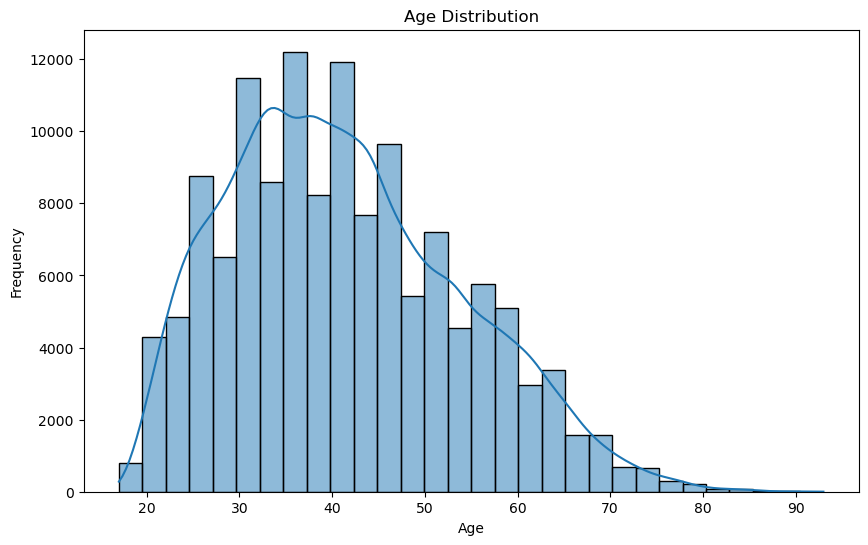

In [17]:
# Visualizing the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

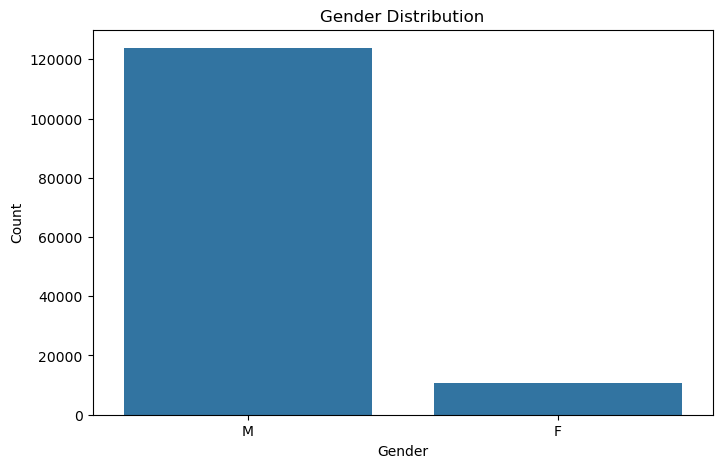

In [18]:
# Visualizing the gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

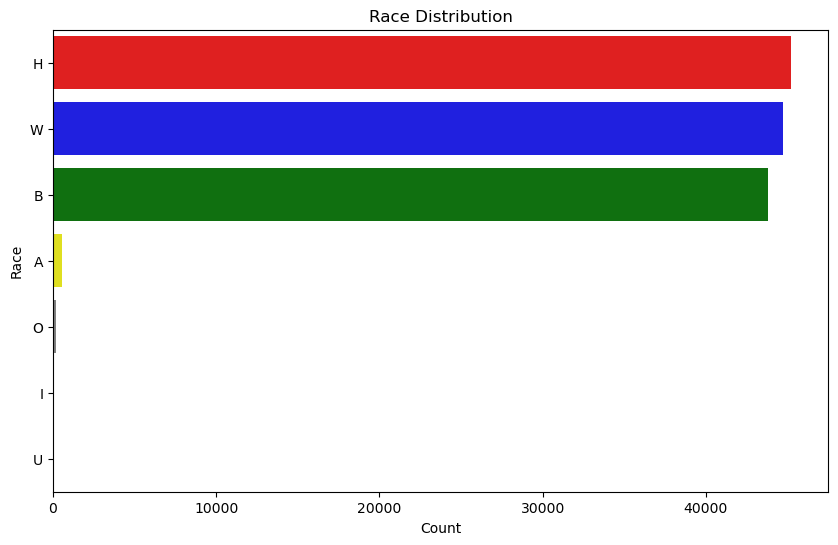

In [19]:
# Defining the custom of color palette
race_palette = {'H': 'red', 'B': 'green', 'W': 'blue', 'A': 'yellow'}

# Ensure all unique race values are in the palette
unique_races = data['Race'].unique()
for race in unique_races:
    if race not in race_palette:
        race_palette[race] = 'gray'
        
 # Visualizing the race distribution       
plt.figure(figsize=(10, 6))
sns.countplot(y='Race', data=data, order=data['Race'].value_counts().index, palette=race_palette)
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()


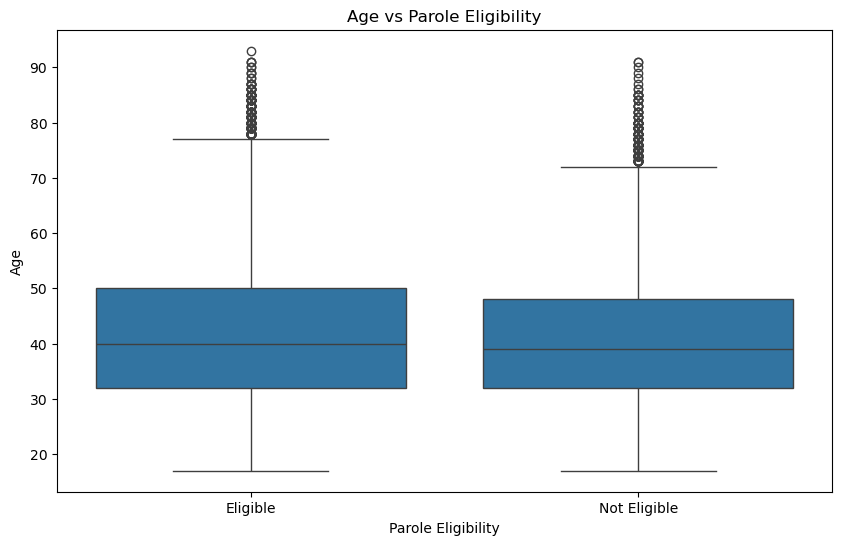

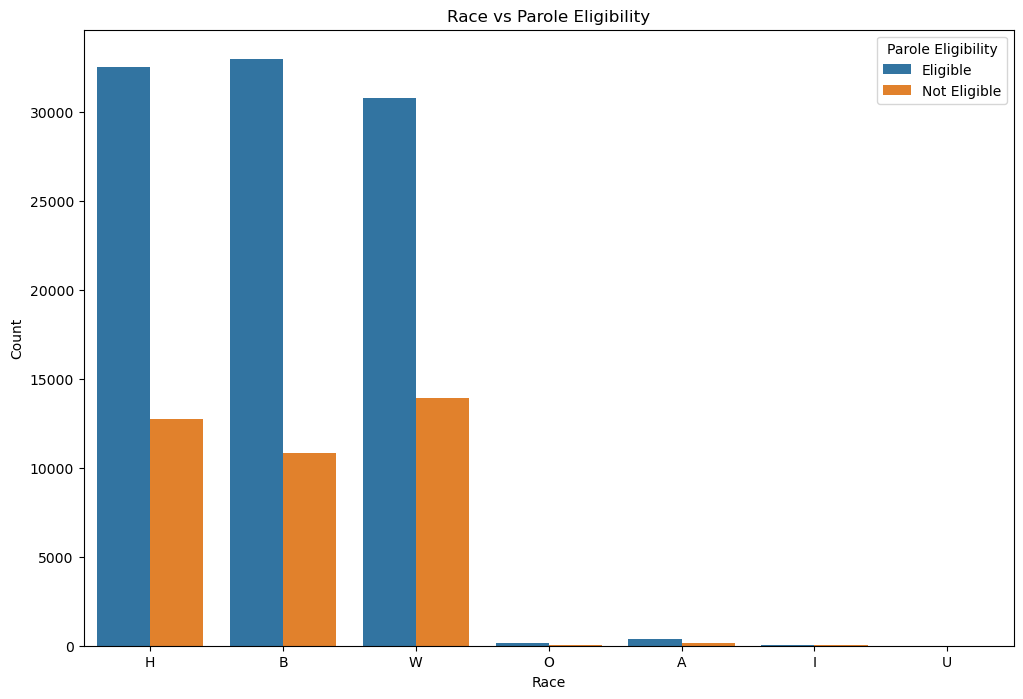

Analysis of Age and Race in relation to Parole Eligibility completed.


In [20]:
# Analyzing the relationship between Age and Parole Eligibility

# Creating a new column to indicate if the individual is eligible for parole
# Assuming eligibility is based on the 'Parole Review Status' column
# Let's categorize it into 'Eligible' and 'Not Eligible'
data['Parole Eligibility'] = data['Parole Review Status'].apply(lambda x: 'Eligible' if 'IN REVIEW' in str(x) else 'Not Eligible')

# Visualizing the relationship between Age and Parole Eligibility
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parole Eligibility', y='Age', data=data)
plt.title('Age vs Parole Eligibility')
plt.xlabel('Parole Eligibility')
plt.ylabel('Age')
plt.show()

# Analyzing the relationship between Race and Parole Eligibility
plt.figure(figsize=(12, 8))
sns.countplot(x='Race', hue='Parole Eligibility', data=data)
plt.title('Race vs Parole Eligibility')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Parole Eligibility')
plt.show()

print('Analysis of Age and Race in relation to Parole Eligibility completed.')

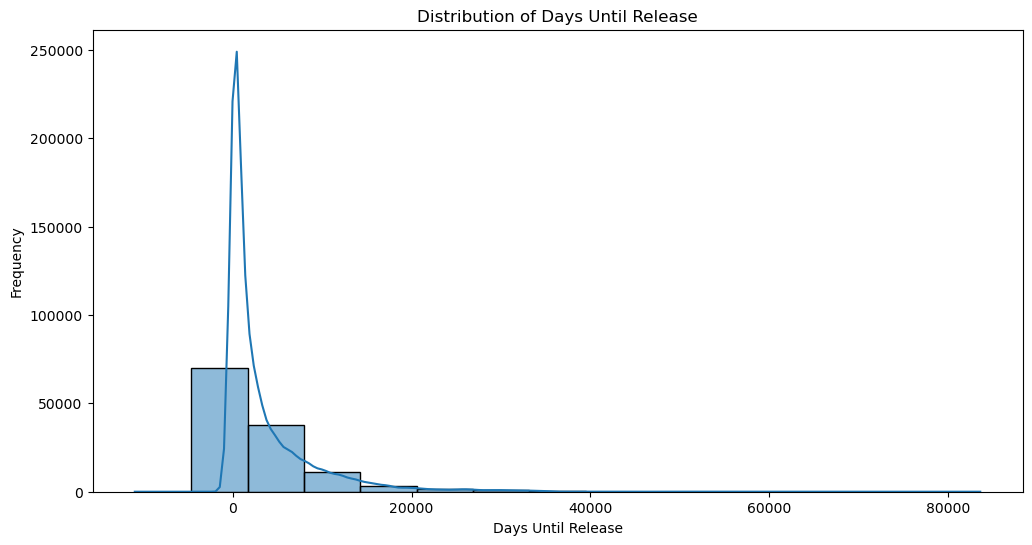

In [21]:
# Visualizing the distribution of 'Days until release'
plt.figure(figsize=(12, 6))
sns.histplot(data['Days until release'].dropna(), bins=15, kde=True)
plt.title('Distribution of Days Until Release')
plt.xlabel('Days Until Release')
plt.ylabel('Frequency')
plt.show()